|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:330px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="300"/></div>|<div style="width:330px"><img src="https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg" width="300"/></div>|
|---|---|--:|

# Seabed response to water waves

In this benchmark example, the response of a seabed to water waves is determined by the application of the theory of poroelasticity. The seabed is described as a homogeneous poroelastic medium consisting of a solid phase (i.e. sand grains) and pores that are quasi-saturated with a Newtonian fluid, such as water. The pores are not completely saturated with water as they contain small bubbles of air, which cause the compressibility of the pore space. The pressure along the bottom of the sea depends on the water level and therefor varies according to the water waves in space as well as time. Arnold Verruijt in his book "Theory and problems of poroelasticity" [1] derives an analytical solution of the stress distribution in the seabed for the case of sinusoidal water waves. For the analytical solution, some assumptions have been made:
* disregarded body forces
* homogenous linear elastic material
* compressibility of the particles is taken into account
* water waves are stationary and only dependent on one horizontal direction (x-direction in this example)
* plain strain condition

The last two assumptions allow a simplification of the three-dimensional seabed to a planar geometry.

For verification of the numerical model, Arnold Verruijt's analytical solution will be compared to the results of the numerical calculation. The behaviour of the seabed depends on various parameters describing the soil, fluid and wave properies. In this  example, the parameters of both the analytical and the numerical solution are  chosen as follows:

#### Input parameters

$$
\begin{aligned}
&\begin{array}{llll}
 C_{f} & \textsf{compressibility of the fluid} & \textsf{[1/Pa]}  & C_{f} = 0 \textsf{ 1/Pa}\\
 C_{s} & \textsf{compressibility of the solid particles}& \textsf{[1/Pa]}  & C_{s} = 0 \textsf{ 1/Pa}\\
 G & \textsf{shear modulus} & \textsf{[Pa]} & G = 100 \textsf{ kPa} \\
 K & \textsf{bulk modulus} &  \textsf{[Pa]} & K = \frac{2}{3} G \,(\textsf{with } \nu = 0) \\
 L & \textsf{wave length} &  \textsf{[m]} & L = 100 \textsf{ m} \\
 T & \textsf{periodic time} &  \textsf{[s]} & T=\frac{1}{f} = 10 \textsf{ s} \\
 \gamma_{w} & \textsf{volumetric weight of water} & \textsf{[kN/m³]} & \gamma_{w} = 9,81 \textsf{ kN/m³} \\
 \kappa & \textsf{(intrinsic) permeability} & \textsf{[m²]} & \kappa = 10^{-11}  \textsf{ m² $($equals } k_{f}=10^{-4} \textsf{ m/s$)$} \\
\mu & \textsf{dynamic viscosity of water} & \textsf{[Pas]} & \mu = 1,3 \textsf{ mPas $($at $\theta=10$ °C$)$} \\
 \nu & \textsf{Poisson's ratio} & \textsf{[-]} & \nu = 0\\
\end{array}
\end{aligned}
$$


#### Derived parameters

$$
\begin{aligned}
&\begin{array}{llll}
 c_{v} & \textsf{coefficient of consolidation} & \textsf{[m²/s]} & c_{v} = \frac{kG(1+m)}{(1+SG(1+m))\gamma_{w}} =  \frac{k(K+\frac{4}{3}G)}{(1+S(K+\frac{4}{3}G))\gamma_{w}}  \\
 m & \textsf{dimensionless parameter} & \textsf{[-]} & m = \frac{1}{1-2\nu} = \frac{K+\frac{1}{3}G}{G} \\
 k & \textsf{hydraulic conductivity} & \textsf{[m/s]} & k = \frac{\kappa\rho_{f}g}{\mu} \\
 C_{m} & \textsf{compressibility of the porous medium} & \textsf{[1/Pa]}& C_{m} = \frac{1}{K} \\
 S & \textsf{storativity of the pore space}& \textsf{[-]}  & S=nC_{f}+(\alpha-n)C_{s} \\
 \alpha & \textsf{Biot coefficient} & \textsf{[-]} & \alpha=1-\frac{C_{s}}{C_{m}} \\
 \lambda & \textsf{wave number} & \textsf{[1/m]} & \lambda=\frac{\omega}{c} = \frac{\omega T}{L} \\
 \xi^2 & \textsf{complex parameter} & \textsf{[1/m²]} & \xi^2 = \lambda^2 + \frac{\omega}{c_{v}}i \\
 \omega & \textsf{frequency of the wave} & \textsf{[1/s]} & \omega = 2 \pi f \\
\end{array}
\end{aligned}
$$

### Analytical solution for stationary waves

#### Boundary conditions

The considered region is the half plane $y>0$ with a load in the form of a stationary wave applied on the surface $y=0$. In that case, the boundary conditions are supposed to be:

$$
\begin{aligned}
&y=0:p=\tilde{p}\cdot e^{i(\omega t-\frac{\pi}{2})}\cdot\cos(\lambda x) \\
&y=0: \sigma'_{yy}=0 \\
&y=0: \sigma'_{xy}=0
\end{aligned}
$$

where $p$ is the pore pressure, $\tilde{p}$ is the amplitude of the applied load, $\sigma'_{yy}$ is the effective vertical stress and $\sigma'_{xy}$ is the effective shear stress. The boundary condition of  the pore pressure describes the space- and time-dependent water wave. Compared to Arnold Verruijt's solution, in this example there is a phase shift of $-\frac{\pi}{2}$ in the time-dependent part. The phase shift is necessary to obtain a water wave that starts oszillating from the equilibrium state (sine instead of cosine) and thus to be able to set an initial condition of $p=0$ Pa on the whole domain in the numerical solution. 

With these boundary conditions, the following four constants are determined:

$$
\begin{aligned}
&\begin{array}{l}
&B_{1} &= &(1+m)(\xi^2-\lambda^2)-2\lambda(\xi-\lambda) \\
&B_{2} &= &2m\theta\lambda\xi+\theta[(1+m)(\xi^2-\lambda^2)-2\lambda(\xi-\lambda)] \\
&B_{3} &= &2m\theta\lambda\\
&D  &= &2\lambda[2\lambda(\xi-\lambda)-(1+m)(1+m\theta)(\xi^2-\lambda^2)]
\end{array}
\end{aligned}
$$

#### The stresses
For the given boundary conditions, the pore pressure and the effective stresses can be calculated with the following equations. According to the sign convention commonly used in soil mechanics, compressive stresses are positive and tensile stresses are negative. In all these equations, the real part is to be taken only.

$$
\begin{aligned}
&\frac{p}{\tilde{p}} &= &\mathscr{R}\left\{\frac{-2\lambda B_{1}\cdot e^{-\lambda y}-(1+m)(\xi^2-\lambda^2)B_{3}\cdot e^{-\xi y}}{D}\cdot e^{i(\omega t-\frac{\pi}{2})}\cdot\cos(\lambda x)\right\} \\
\\
&\frac{\sigma'_{xx}}{\alpha\tilde{p}} &= &\mathscr{R}\left\{\frac{[-2(m-1)\lambda\theta+2\lambda(1+m\theta)\lambda y]B_{1}\cdot e^{-\lambda y}-2\lambda B_{2} \cdot e^{-\lambda y}+[(m-1)(\xi^2-\lambda^2)-2\lambda^2]B_{3} \cdot e^{-\xi y}}{D} \cdot e^{i(\omega t-\frac{\pi}{2})} \cdot \cos(\lambda x) \right\} \\
\\
&\frac{\sigma'_{yy}}{\alpha\tilde{p}} &= &\mathscr{R}\left\{\frac{[-2(m+1)\lambda\theta-2\lambda(1+m\theta)\lambda y]B_{1}\cdot e^{-\lambda y}+2\lambda B_{2} \cdot e^{-\lambda y}+[(m-1)(\xi^2-\lambda^2)+2\xi^2]B_{3} \cdot e^{-\xi y}}{D} \cdot e^{i(\omega t-\frac{\pi}{2})} \cdot \cos(\lambda x) \right\} \\
\\
&\frac{\sigma'_{xy}}{\alpha\tilde{p}} &= &\mathscr{R}\left\{\frac{[-2\lambda(1+m\theta)\lambda y-2\lambda\theta]B_{1}\cdot e^{-\lambda y}+2\lambda B_{2} \cdot e^{-\lambda y}+2\xi\lambda B_{3} \cdot e^{-\xi y}}{D} \cdot e^{i(\omega t-\frac{\pi}{2})} \cdot \sin(\lambda x) \right\} \\
\end{aligned}
$$

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rc ('font', size = 8)
plt.rc ('axes', titlesize = 10)
plt.rc ('axes', labelsize = 10)

#import gmsh

import pyvista as pv
pv.set_plot_theme("document")
pv.set_jupyter_backend("static")

In [17]:
def compute_pressure_and_stresses(t,x,z):
    
    n=0.4
    G=100e3             # [Pa]
    K=2/3*G             # [Pa]    (with ny=0)
    ny=0                # E = 3K(1-2ny) = 2G(1+ny)
    Cf=0                # in the book: Cf = 0.001/K
    Cs=0
    Cm=1/K
    my=1.3e-3           # [Pa*s]
    kappa=1e-11         # [m²]    (medium sand, kf=10e-4 m/s)   
    gamma_w = 9.81e3    # [Pa/m]
    lam=2*np.pi*0.1*10/100
    omega=2*np.pi*0.1
   
    k = kappa*gamma_w/my                                       # Gl. (1.33)
    alpha = 1-Cs/Cm                                            # Gl. (4.15)
    S = n*Cf + (alpha-n)*Cs                                    # Gl. (1.28)
    theta = S*G/alpha**2                                       # Gl. (4.13)
    m = 1/(1-2*ny) # = K+1/3*G/G                               # Gl. (4.5)
    cv = k*G*(1+m) / (alpha**2*(1+theta+m*theta)*gamma_w)      # Gl. (4.12)
    xi_2 = complex(lam**2, (omega/cv))                         # Gl. (4.19)
   
    B1 = (1+m)*(xi_2-lam**2)-2*lam*(np.sqrt(xi_2)-lam)
    B2 = 2*m*theta*lam*np.sqrt(xi_2)+theta*((1+m)*(xi_2-lam**2)-2*lam*(np.sqrt(xi_2)-lam))
    B3 = 2*m*theta*lam
    D = 2*lam*(2*lam*(np.sqrt(xi_2)-lam)-(1+m)*(1+m*theta)*(xi_2-lam**2))
    p_rel = np.real((-2*lam*B1*np.exp(-lam*z) - (1+m)*(xi_2-lam**2)*B3*np.exp(-np.sqrt(xi_2)*z))/D * np.exp((omega*t-np.pi*0.5)*1j)*np.cos(lam*x))
    sig_xx_rel = np.real(((-2*(m-1)*lam*theta + 2*lam*(1+m*theta)*lam*z)*B1*np.exp(-lam*z) - 2*lam*B2*np.exp(-lam*z) + ((m-1)*(xi_2-lam**2) - 2*lam**2)*B3*np.exp(-np.sqrt(xi_2)*z))/D * np.exp((omega*t-np.pi*0.5)*1j)*np.cos(lam*x))
    sig_zz_rel = np.real(((-2*(m+1)*lam*theta - 2*lam*(1+m*theta)*lam*z)*B1*np.exp(-lam*z) + 2*lam*B2*np.exp(-lam*z) + ((m-1)*(xi_2-lam**2) + 2*xi_2)*B3*np.exp(-np.sqrt(xi_2)*z))/D * np.exp((omega*t-np.pi*0.5)*1j)*np.cos(lam*x))
    sig_xz_rel = np.real(((-2*lam*(1+m*theta)*lam*z-2*lam*theta)*B1*np.exp(-lam*z) + 2*lam*B2*np.exp(-lam*z) + 2*np.sqrt(xi_2)*lam*B3*np.exp(-np.sqrt(xi_2)*z))/D * np.exp((omega*t-np.pi*0.5)*1j)*np.sin(lam*x))
    return p_rel, sig_xx_rel, sig_zz_rel, sig_xz_rel

By evaluating these equations at different times $t$ and depths $y$, we gain a better understanding of the pressure and stress distribution in the seabed. The below plot illustrates the pore pressure and the amplitude of the effective stresses as a function of depth directly underneath an anti-node of the standing water wave (the place where the amplitude is at maximum, i.e. for $x = k \cdot \frac{L}{2}$, where $k=0, 1, 2,$ ...).

Along the top edge of the seabed, the pore pressure is always as large as the applied load and the effective stresses are zero. This means, that all the change in pressure is absorbed by the fluid while the soil particles remain in their initial stress state (in this case zero, since body forces are being disregarded). The increased pore pressure at the top edge cannot propagate freely downwards into the seabed because seepage is limited by the hydraulic conductivity of the soil. Consequently, the pore pressure decreases with depth as the soil matrix gradually takes up the remaining share of the total stress in the seabed. 

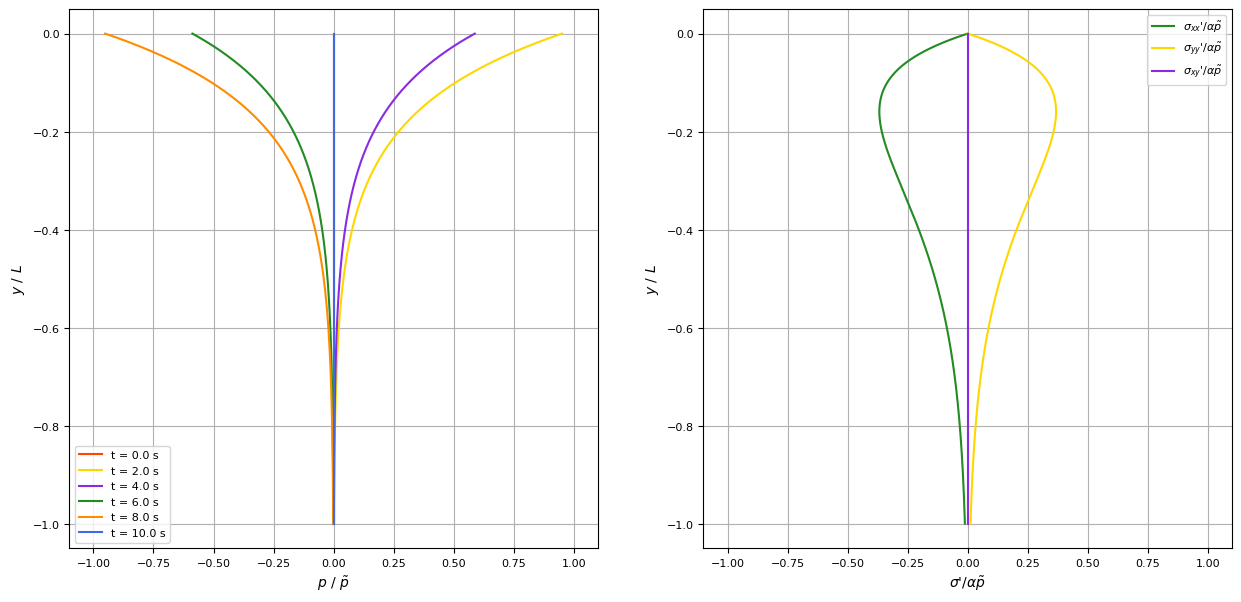

In [18]:
y = np.linspace(0,100,1000)
y_rel = y/100
colors = {0:"orangered", 2:"gold", 4:"blueviolet", 6:"forestgreen", 8:"darkorange", 10:"royalblue"}

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
for idx in (0,1):
    ax[idx].grid(True)
    ax[idx].set_ylabel("$y$ / $L$")
    ax[idx].set_xlim(-1.1,1.1)

for t in [0,2,4,6,8,10]:
    ax[0].plot(compute_pressure_and_stresses(t,0,y)[0], -y_rel, color=colors[t], label= "t = %.1f s" %t)

t=2.5
ax[0].set_xlabel("$p$ / $\\tilde{p}$")
ax[0].legend()
ax[1].plot(compute_pressure_and_stresses(t,0,y)[1], -y_rel, color = colors[6], label = "$\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
#ax[1].plot(compute_pressure_and_stresses(t,0,y)[1]+compute_pressure_and_stresses(t,0,y)[0], -y_rel, linestyle = "--", color = colors[3], label = "$\\sigma_{xx}$/$\\alpha\\tilde{p}$")  # Total horizontal stress
ax[1].plot(compute_pressure_and_stresses(t,0,y)[2], -y_rel, color = colors[2], label = "$\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
#ax[1].plot(compute_pressure_and_stresses(t,0,y)[2]+compute_pressure_and_stresses(t,0,y)[0], -y_rel, linestyle = "--", color = colors[1], label = "$\\sigma_{yy}$/$\\alpha\\tilde{p}$")  # Total vertical stress
ax[1].plot(compute_pressure_and_stresses(t,0,y)[3], -y_rel, color = colors[4], label = "$\\sigma_{xy}$'/$\\alpha\\tilde{p}$")
ax[1].set_xlabel("$\sigma$'/$\\alpha\\tilde{p}$")
ax[1].legend();

The following plot illustrates the pore pressure and the effective stresses at different depths underneath an anti-node over time. Here it becomes clear that the vertical and the horizontal effective stresses behave symmetrically in space as well as time.

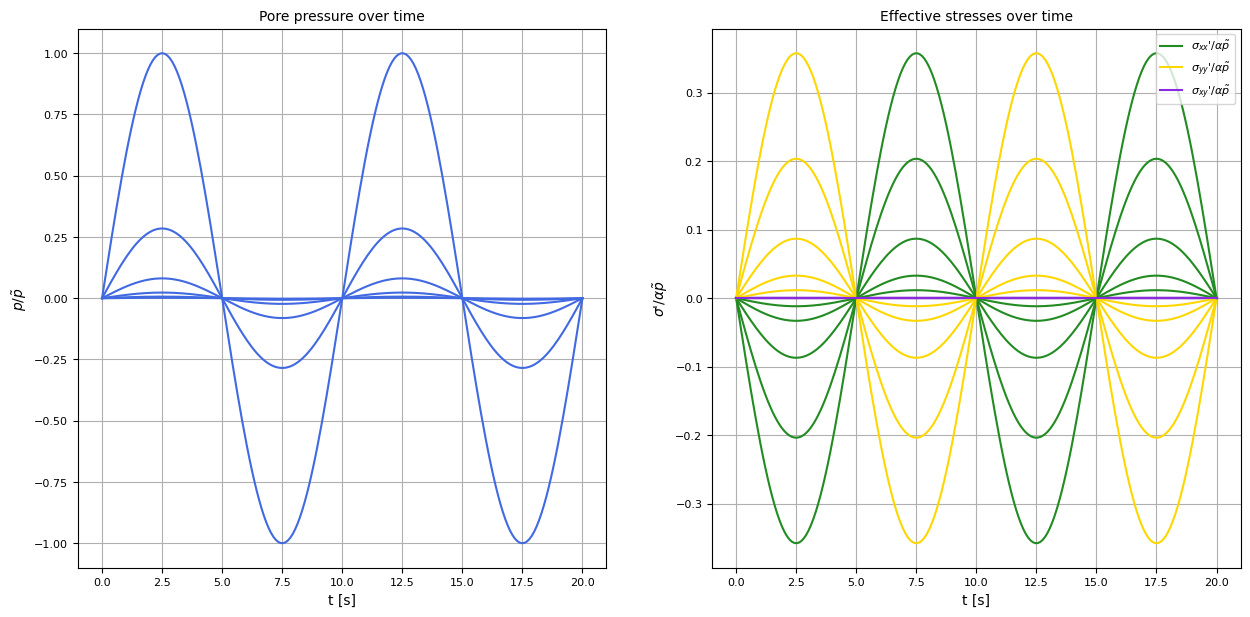

In [40]:
t=np.linspace(0,20,200)
colors = {1:"gold", 2:"blueviolet", 3:"forestgreen", 4:"royalblue"}

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
for idx in (0,1):
    ax[idx].grid(True)
    ax[idx].set_xlabel("t [s]")

for y in (np.linspace(0,100,6)):
    ax[0].plot( t, compute_pressure_and_stresses(t,0,y)[0], color = colors[4])
    ax[0].set_ylabel("$p/\\tilde{p}$")
    ax[1].plot(t, compute_pressure_and_stresses(t,0,y)[1], color = colors[3], label = "$\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
    ax[1].plot(t, compute_pressure_and_stresses(t,0,y)[2], color = colors[1], label = "$\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
    ax[1].plot(t, compute_pressure_and_stresses(t,0,y)[3], color = colors[2], label = "$\\sigma_{xy}$'/$\\alpha\\tilde{p}$")
    if y == 0:
        ax[1].legend(loc="upper right")

ax[1].set_ylabel("$\sigma$'/$\\alpha\\tilde{p}$")

    
ax[0].set_title("Pore pressure over time")
ax[1].set_title("Effective stresses over time");

For a better understanding of the planar pressure and stress distribution, the following 2D color-plots are helpful. Each of the diagramms illustrates the pressure or stress distribution at a timepoint, where the applied load is at maximum.

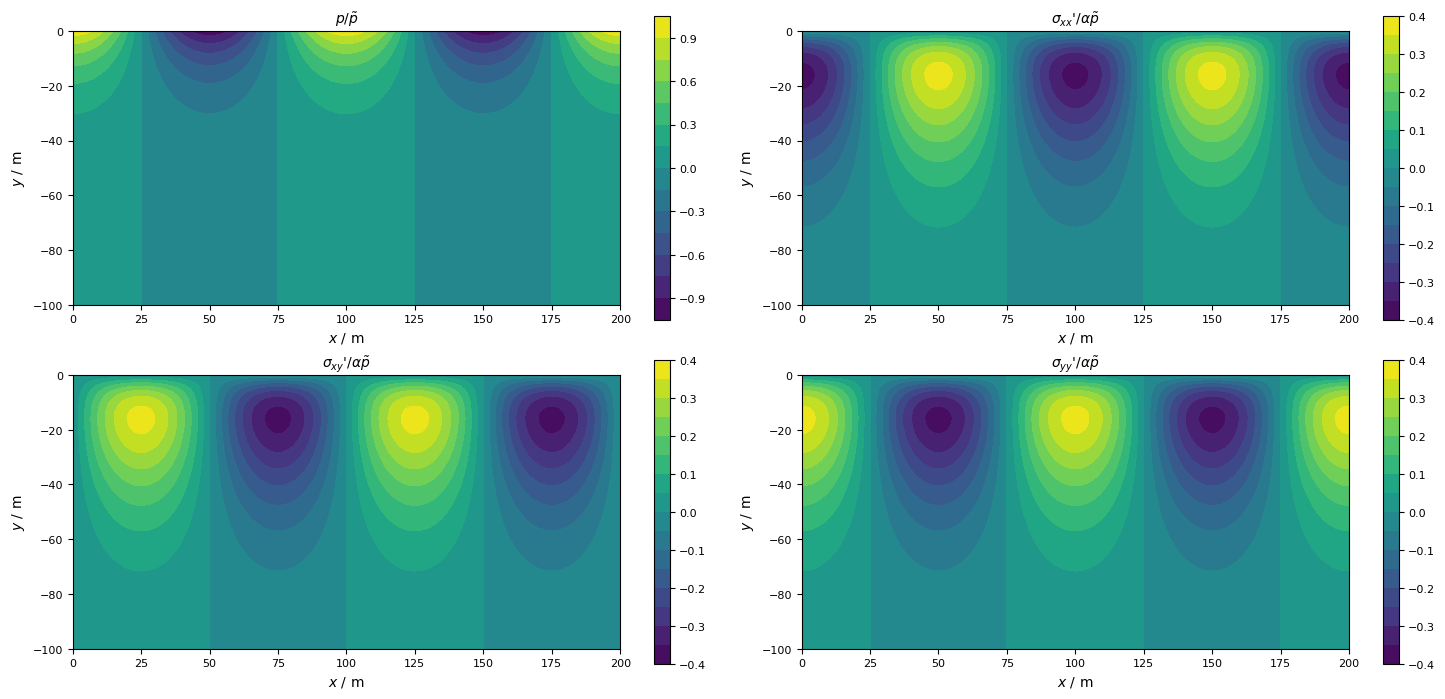

In [21]:
x, y = np.meshgrid(np.linspace(0,200,1000),np.linspace(0,100,1000))
t = 2.5

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,7))
l1=ax[0][0].contourf(x,-y, compute_pressure_and_stresses(t,x,y)[0], 15)
l2=ax[0][1].contourf(x,-y, compute_pressure_and_stresses(t,x,y)[1], 15)
l3=ax[1][1].contourf(x,-y, compute_pressure_and_stresses(t,x,y)[2], 15)
l4=ax[1][0].contourf(x,-y, compute_pressure_and_stresses(t,x,y)[3], 15)
fig.colorbar(l1,ax=ax[0][0])
fig.colorbar(l2,ax=ax[0][1])
fig.colorbar(l3,ax=ax[1][1])
fig.colorbar(l4,ax=ax[1][0])
for i in (0,1):
    for j in (0,1):
        ax[i][j].set_aspect('equal')
        ax[i][j].set_xlabel('$x$ / m')
        ax[i][j].set_ylabel('$y$ / m')
ax[0][0].set_title("$p/\\tilde{p}$")
ax[0][1].set_title("$\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
ax[1][1].set_title("$\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
ax[1][0].set_title("$\\sigma_{xy}$'/$\\alpha\\tilde{p}$")
fig.tight_layout();

### Numerical solution
In the following section, the behavior of the seabed under the influence of standing water waves is solved numerically by FEM in OpenGeoSys. The principle of Finite Element Methods is to subdivide a large and complex object into smaller parts (called finite elements), which is achieved by the construction of a mesh of the object. For each of the meshes' nodes, an approximation of the real solution is calculated. Therefore, numerical solutions always contain errors that originate in the so-called space discretization. The finer the resolution of a mesh, the more accurately the approximation matches the real solution. However, a large number of elements and nodes also causes longer calculation times. A description of the meshing process for this specific example follows below.

For transient problems, a time discretization must also be carried out in addition to the space discretization. In doing so, the observed time period is divided into finite time steps. Here too, smaller timesteps come along with more accurate results but longer calculation times. For the numerical simulation of the seabed, a timestep of $\Delta t = 0.25$ s was chosen. With a periodic time of the water wave of $T=10$ s, there are $40$ timesteps per period. The number of timesteps per period should be large enough to enable an accurate representation of the wave's sinusoidal shape.

#### Meshing

Since the problem can be simplified to a planar geometry, a two-dimensional mesh is constructed for the numerical solution. Here, the Gmsh application programming interface (API) for python is used to generate a structured mesh of rectangular shape. This allows a parametric input of the geometry's dimensions and the mesh refinement. The generated mesh consists of quadratic elements, which have mid-side-nodes. In that way, displacements between nodes at the vertices can be interpolated using a higher order polynomial.

For the further use in OpenGeoSys, the gmsh-mesh is converted to the vtu-format using the msh2vtu script.

In [7]:
# directory "out" will contain all data that we produce
! mkdir -p out

In [3]:
def generate_mesh_axb(a,b,Nx,Ny,P):
    output_file = f"out/square_{a}x{b}.msh"
    
    lc=0.5

    # Before using any functions in the Python API, Gmsh must be initialized:
    gmsh.initialize()
    gmsh.option.setNumber("General.Terminal", 1)
    gmsh.model.add("rectangle")

    # Dimensions
    dim1 = 1
    dim2 = 2

    # Outer points (ccw)
    gmsh.model.geo.addPoint(0,   -b,    0, lc,  1)
    gmsh.model.geo.addPoint(a,   -b,    0, lc,  2)
    gmsh.model.geo.addPoint(a,   -b/2,  0, lc,  3)
    gmsh.model.geo.addPoint(a,    0,    0, lc,  4)
    gmsh.model.geo.addPoint(0,    0,    0, lc,  5)
    gmsh.model.geo.addPoint(0,   -b/2,  0, lc,  6)


    # Outer lines (ccw)
    gmsh.model.geo.addLine(1, 2, 1)
    gmsh.model.geo.addLine(2, 3, 2)
    gmsh.model.geo.addLine(3, 4, 3)
    gmsh.model.geo.addLine(4, 5, 4)
    gmsh.model.geo.addLine(5, 6, 5)
    gmsh.model.geo.addLine(6, 1, 6)
    gmsh.model.geo.addLine(6, 3, 7)


    # The third elementary entity is the surface. In order to define a surface 
    # from the curves defined above, a curve loop has first to be defined (ccw).
    gmsh.model.geo.addCurveLoop([ 1,  2,  -7,  6], 1)
    gmsh.model.geo.addCurveLoop([ 7,  3,   4,  5], 2)

    # Add plane surfaces defined by one or more curve loops.
    gmsh.model.geo.addPlaneSurface([1], 1)
    gmsh.model.geo.addPlaneSurface([2], 2)

    gmsh.model.geo.synchronize()

    #  Prepare structured grid
    gmsh.model.geo.mesh.setTransfiniteCurve( 1, Nx)
    gmsh.model.geo.mesh.setTransfiniteCurve( 2, int(Ny*0.3))
    gmsh.model.geo.mesh.setTransfiniteCurve( 3, Ny, "Progression", -P)
    gmsh.model.geo.mesh.setTransfiniteCurve( 4, Nx)
    gmsh.model.geo.mesh.setTransfiniteCurve( 5, Ny, "Progression", P)
    gmsh.model.geo.mesh.setTransfiniteCurve( 6, int(Ny*0.3))
    gmsh.model.geo.mesh.setTransfiniteCurve( 7, Nx)

    gmsh.model.geo.mesh.setTransfiniteSurface(1, "Alternate")
    gmsh.model.geo.mesh.setTransfiniteSurface(2, "Alternate")

    gmsh.model.geo.mesh.setRecombine(dim2, 1)
    gmsh.model.geo.mesh.setRecombine(dim2, 2)

    gmsh.model.geo.synchronize()

    # Physical groups (only this gets saved to file per default)
    Bottom = gmsh.model.addPhysicalGroup(dim1, [1])
    gmsh.model.setPhysicalName(dim1, Bottom, "Bottom")

    Right = gmsh.model.addPhysicalGroup(dim1, [2, 3])
    gmsh.model.setPhysicalName(dim1, Right, "Right")

    Top = gmsh.model.addPhysicalGroup(dim1, [4])
    gmsh.model.setPhysicalName(dim1, Top, "Top")

    Left = gmsh.model.addPhysicalGroup(dim1, [5, 6])
    gmsh.model.setPhysicalName(dim1, Left, "Left")

    Plate = gmsh.model.addPhysicalGroup(dim2, [1, 2])
    gmsh.model.setPhysicalName(dim2, Plate, "Plate")

    gmsh.model.geo.synchronize()

    gmsh.model.mesh.generate(dim2)
    # gmsh.option.setNumber('Mesh.SecondOrderIncomplete', 1)   # serendipity elements
    gmsh.model.mesh.setOrder(2)   # higher order elements (quadratic)
    gmsh.write(output_file)

    gmsh.finalize()


In [4]:
generate_mesh_axb(200,100,25,45,1.07)

NameError: name 'gmsh' is not defined

In [10]:
input_file = "out/square_200x100.msh"
!python /opt/conda/lib/python3.10/site-packages/msh2vtu/msh2vtu.py --ogs {input_file}

MeshIO 5.3.4 found, MSH2VTU was tested with MeshIO 5.3.8.
sys:1: UserWarning: Warning, out-dated MeshIO version. In case of errors watch for commented code fragments from previous versions in this script (msh2vtu).
##

Original mesh (read)
5537 points in 3 dimensions; cells: 160 line3, 1344 quad9; point_data=['gmsh:dim_tags']; cell_data=['gmsh:physical', 'gmsh:geometrical']; cell_sets=['Bottom', 'Right', 'Top', 'Left', 'Plate', 'gmsh:bounding_entities']
##
Detected mesh dimension: 2
##
Domain mesh (written)
5537 points in 3 dimensions; cells: 1344 quad9; point_data=['original_node_number']; cell_data=['MaterialIDs']; cell_sets=[]
##
Boundary mesh (written)
320 points in 3 dimensions; cells: 160 line3; point_data=['bulk_node_ids']; cell_data=['bulk_elem_ids']; cell_sets=[]
##
Submesh Bottom (written)
49 points in 3 dimensions; cells: 24 line3; point_data=['bulk_node_ids']; cell_data=['bulk_elem_ids']; cell_sets=[]
##
Submesh Right (written)
113 points in 3 dimensions; cells: 56 line3; p

The below figure shows the generated mesh with a width of $a=2L=200$ m and a height (or rather depth) of $b=L=100$ m.

**Note:** the origin of coordinates is located at ground level, therefore y-coordinates are negative

As was already visible in the analytical solution, the pressure and stress gradients are particularly high in the upper half of the geometry. Therefore, it makes sense to refine the mesh in this area.

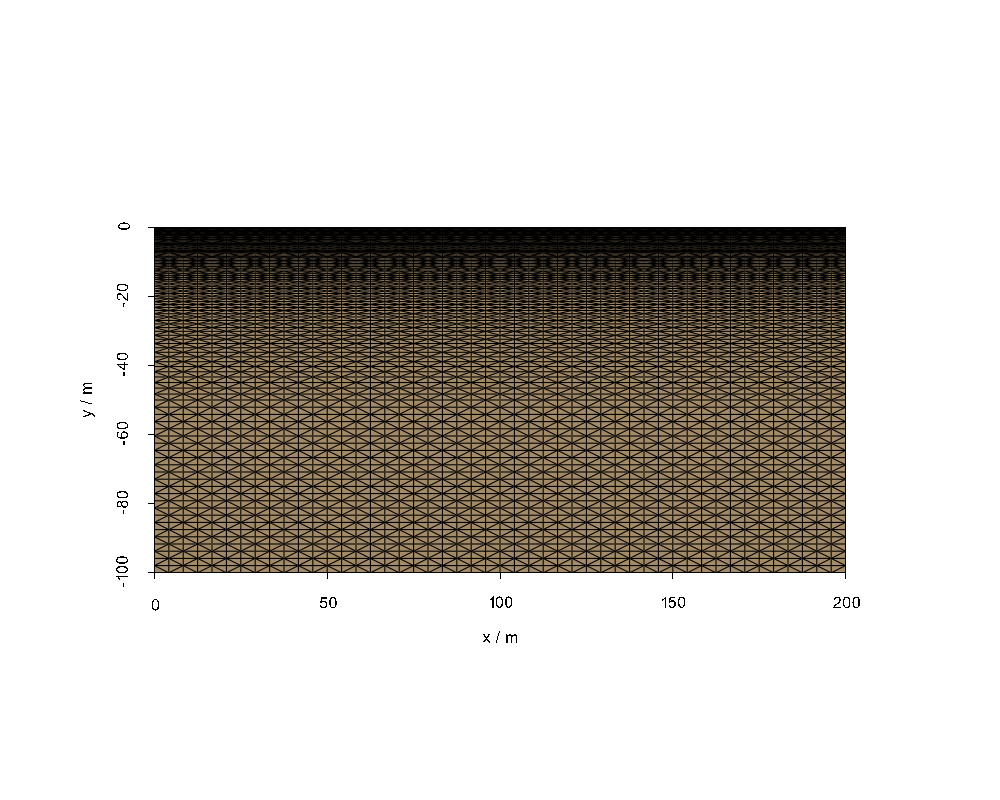

In [51]:
pv.set_plot_theme("document")
pv.set_jupyter_backend("static")

mesh = pv.read("out/square_200x100_domain.vtu")
plotter = pv.Plotter(window_size = [1000, 800])
plotter.add_mesh(mesh, show_edges=True, show_scalar_bar=False, color=None, scalars=None)

plotter.show_bounds(ticks="outside", xlabel="x / m", ylabel="y / m")
plotter.view_xy()
plotter.show()

#### Boundary and initial conditions
Because it would not be possible and useful to solve the problem for an infinitely extended seabed, the observed domain has limited dimensions. This however calls for the definition of boundary conditions at the edges of the domain. Boundary conditions constrain the value of a process variable (Dirichlet boundary condition) or the derivative of a process variable applied at the boundary of the domain (Neumann boundary condition). The process variables in this example are the (pore) pressure $p$ and the displacement $u$.

In this example, the boundary conditions are defined as follows:

**Top:** 
$$
\begin{align}
&\begin{array}{l}
p(y=0)&=\tilde{p}\cdot \sin(\omega \cdot t) \cdot \cos(\frac{2 \pi}{L} \cdot x) \\
\sigma_{yy}(y=0)&=-\tilde{p}\cdot \sin(\omega \cdot t) \cdot \cos(\frac{2 \pi}{L} \cdot x)
\end{array}
\end{align}
$$

These boundary conditions represent the applied load in the form of a stationary wave with an amplitude of $\tilde{p} = 0.1\cdot10^5$ Pa. The Neumann boundary condition of the displacement equates to the vertical total stress (Attention: downwards direction is negative).

**Bottom**:
$$
\begin{align}
u_{y}&(y=L)=0
\end{align}
$$

**Left and right**:
$$
\begin{align}
u_{x}&(x=0)=0 \\
u_{x}&(x=2L)=0
\end{align}
$$

Along the vertical lines directly underneath the anti-nodes of the wave, there is no horizontal displacement. Since the maximum loads appear in that area, the material evades symmetrically to both sides from this line to places of lower stress. For this reason, the vertical boundaries of the domain are chosen exactly along these lines.

Since the problem is time-dependent, initial conditions must be specified as well:
$$
\begin{align}
\vec{u}(t=0)&=\vec{0} \\
p(t=0)&=0 \textsf{ Pa}
\end{align}
$$

#### Running the numerical model

In [22]:
from ogs6py import ogs

In [23]:
## Helper Functions
def read_timestep_mesh(a,time):
    reader = pv.PVDReader(f"out/square_{a}x100.pvd")
    reader.set_active_time_point(int(time*4)) # time [s], delta t = 0.25 s
    mesh = reader.read()[0]
    return mesh

def slice_along_line(mesh, start_point, end_point):
    line = pv.Line(start_point, end_point, resolution = 2)
    return mesh.slice_along_line(line)

def get_pressure_sorted(mesh):
    pressure = mesh.point_data["pressure_interpolated"]
    depth = mesh.points[:,1]
    indices_sorted = np.argsort(depth)
    pressure_sorted = pressure[indices_sorted]
    return pressure_sorted

def get_stresses_sorted(mesh):
    sigma = mesh.point_data["sigma"]
    depth = mesh.points[:,1]
    indices_sorted = np.argsort(depth)
    sigma_xx = - sigma[indices_sorted, 0] # switching sign convention
    sigma_yy = - sigma[indices_sorted, 1]
    #sigma_zz = - sigma[indices_sorted, 2]
    sigma_xy = + sigma[indices_sorted, 3]
    return sigma_xx, sigma_yy, sigma_xy  #,sigma_zz

def get_depth_sorted(mesh):
    depth = mesh.points[:,1]
    indices_sorted = np.argsort(depth)
    return depth[indices_sorted]

def compute_abs_and_rel_pressure_error(pressures, depth, t, x):
    num_points = pressures.shape[0]
    f_abs = np.zeros(num_points)
    f_rel = np.zeros(num_points)
    
    for pt_idx in range(num_points): 
        y =  -depth[pt_idx]
        pressure_ana = compute_pressure_and_stresses(t,x,y)[0]  # returns pressure normalised to the pressure amplitude
        pressure_num = pressures[pt_idx]/0.1e5                  # absolute pressure divided by pressure amplitude
        f_abs[pt_idx] = pressure_num - pressure_ana
        
        if pressure_ana == 0:
            f_rel[pt_idx] = f_abs[pt_idx] / 1e-2
        else:
            f_rel[pt_idx] = f_abs[pt_idx] / pressure_ana
            
    return f_abs, f_rel

def compute_abs_and_rel_stress_error(sigmas, depth, t, x):
    num_points = depth.shape[0]
    f_abs = np.zeros((3, num_points))
    f_rel = np.zeros((3, num_points))
    
    for stress_idx in (0,1,2):
        
        for pt_idx in range(num_points):
            y = -depth[pt_idx]
            sigma_ana = compute_pressure_and_stresses(t,x,y)[stress_idx+1]   # returns stresses normalised to the pressure amplitude
            sigma_num = sigma[stress_idx][pt_idx]/0.1e5                      # absolute stresses divided by pressure amplitude
            f_abs[stress_idx][pt_idx] = sigma_num - sigma_ana

            if sigma_ana == 0:
                f_rel[stress_idx][pt_idx] = f_abs[stress_idx][pt_idx]/ 1e-2
            else:
                f_rel[stress_idx][pt_idx] = f_abs[stress_idx][pt_idx] / sigma_ana
            
    return f_abs, f_rel

In [41]:
model = ogs.OGS(INPUT_FILE="seabed_response_200x100.prj", PROJECT_FILE="seabed_response_200x100.prj")
model.run_model(logfile="out/ogs.log", args="-o out") # write output files to the "out" directory

OGS finished with project file seabed_response_100x100.prj.
Execution took 107.1587426662445 s


The below plot illustrates the pore pressure distribution in the domain at a timepoint where the applied load is at maximum. By comparing this plot to the 2D-colorplots of the analytical solution, it can already be concluded that the numerical solution resembles the analytical solution.

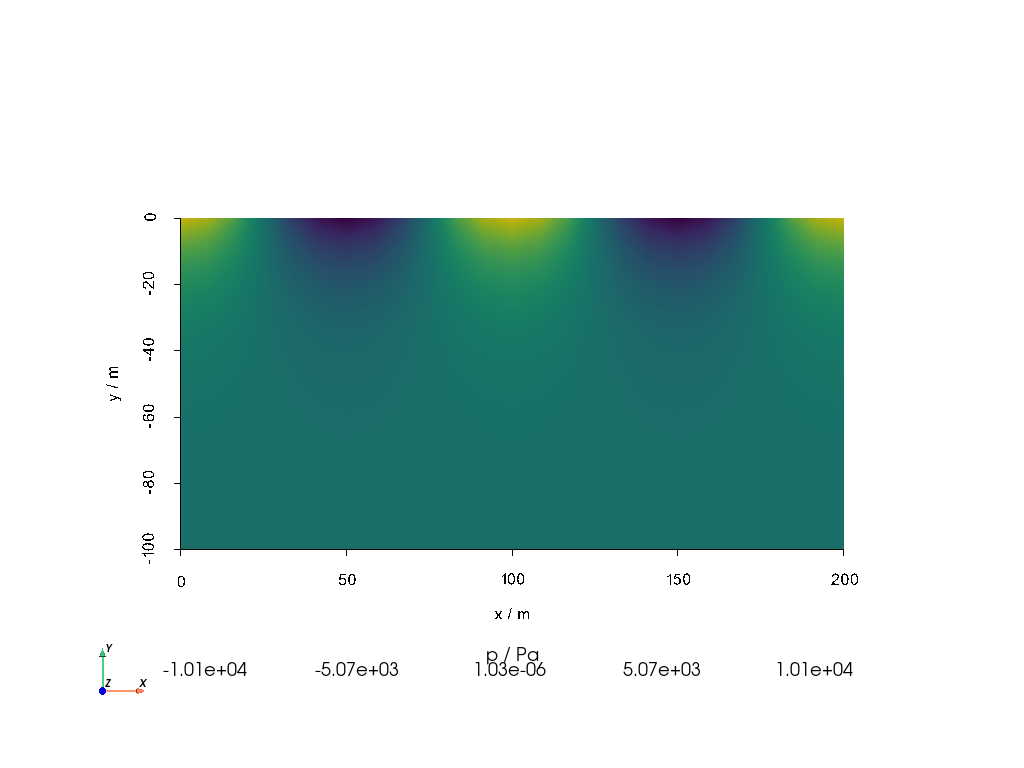

In [26]:
time = 2.5  # [s]
reader = pv.get_reader("out/square_200x100.pvd")
reader.set_active_time_point(int(time*4))
mesh = reader.read()[0]

plotter = pv.Plotter()

sargs = dict(title="p / Pa" , height=0.25, position_x=0.2, position_y=0.02)
plotter.add_mesh(mesh, scalars = "pressure_interpolated", show_edges=False, show_scalar_bar=True, scalar_bar_args=sargs)
plotter.show_bounds(ticks="outside", xlabel = "x / m", ylabel = "y / m")
plotter.add_axes()
plotter.view_xy()
plotter.show()

For a more detailed comparison between the analytical and the numerical solution, both solutions are evaluated along the vertical line directly underneath an anti-node of the standing wave. As before, the pore pressure and the amplitude of the effective stresses are illustrated as a function of depth. The results of the numerical solution are marked as dots in the same color as the analytical solution. Additionally, the absolute errors $\Delta p = p_{numerical}-p_{analtical}$ and $\Delta \sigma_{i}' = \sigma_{i, numerical}'-\sigma_{i, analytical}'$ are illustrated on the right. 

The plot shows that the absolute errors are very small at about $2 \%$ of the wave's amplitude. They can mostly be ascribed to the space- and time-discretization. Close to the top boundary of the domain, larger errors occur. These errors could originate in the definition of both a pressure and displacement (Neumann-) boundary condition along the top edge. 

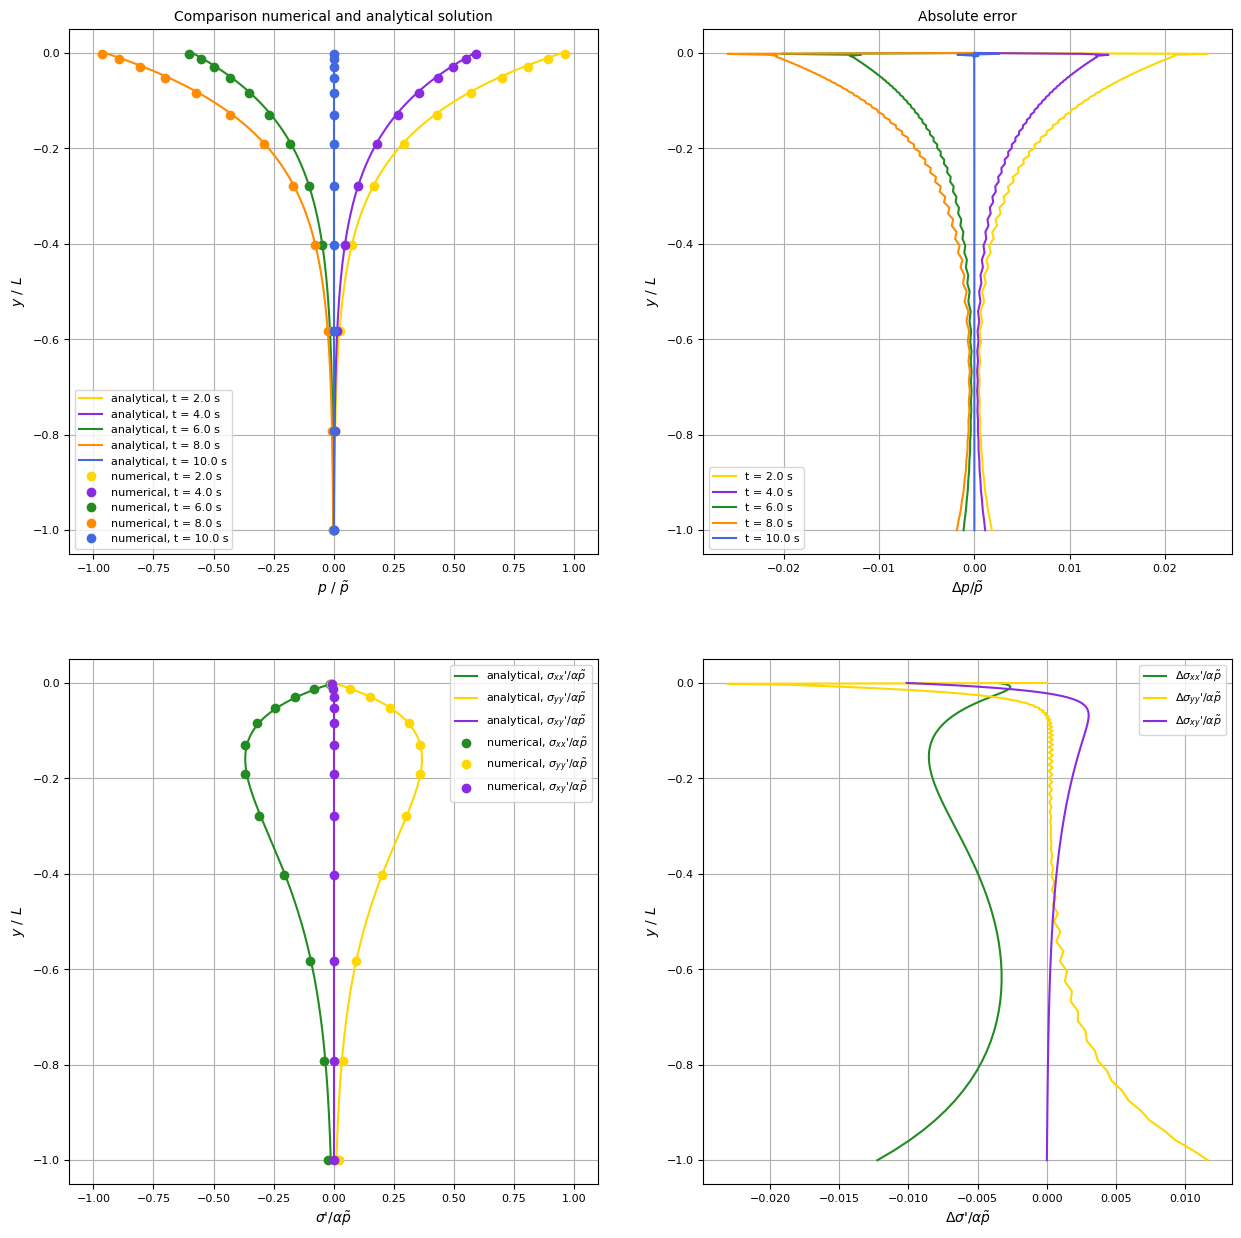

In [36]:
x = 0
y = np.linspace(0,100,1000)
y_rel = y/100
colors = {0:"orangered", 2:"gold", 4:"blueviolet", 6:"forestgreen", 8:"darkorange", 10:"royalblue"}

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

## Plotting analytical solution
for t in [2,4,6,8,10]:
    ax[0][0].plot(compute_pressure_and_stresses(t,x,y)[0], -y_rel, color=colors[t], label= "analytical, t = %.1f s" %t)

ax[1][0].plot(compute_pressure_and_stresses(2.5,x,y)[1], -y_rel, color = colors[6], label = "analytical, $\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
ax[1][0].plot(compute_pressure_and_stresses(2.5,x,y)[2], -y_rel, color = colors[2], label = "analytical, $\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
ax[1][0].plot(compute_pressure_and_stresses(2.5,x,y)[3], -y_rel, color = colors[4], label = "analytical, $\\sigma_{xy}$'/$\\alpha\\tilde{p}$")

## Plotting numerical solution
p1 = (x+1e-6, 0, 0)
p2 = (x+1e-6, -100, 0)

for t_num in (2, 2.5, 4, 6, 8, 10):
    mesh = read_timestep_mesh(200, t_num)
   
    line_mesh = slice_along_line(mesh, p1, p2) 
    pressure = get_pressure_sorted(line_mesh)
    sigma = get_stresses_sorted(line_mesh)
    depth = get_depth_sorted(line_mesh)
    f_abs_pressure = compute_abs_and_rel_pressure_error(pressure, depth, t_num, x)[0]
    f_abs_sigma = compute_abs_and_rel_stress_error(sigma, depth, t_num, x)[0]

    if t_num != 2.5:
        ax[0][0].plot(pressure/0.1e5, depth/100, "o", markevery=10, color=colors[t_num], label= "numerical, t = %.1f s" %t_num) 
        ax[0][0].set_xlabel("$p$ / $\\tilde{p}$")

        ax[0][1].plot(f_abs_pressure, depth/100, color=colors[t_num], label = "t = %.1f s" %t_num)
        ax[0][1].set_xlabel("$\\Delta p /\\tilde{p}$")
   
    if t_num == 2.5:
        ax[1][0].plot(sigma[0]/0.1e5, depth/100, "o", markevery=10, color = colors[6], label = "numerical, $\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
        ax[1][0].plot(sigma[1]/0.1e5, depth/100, "o", markevery=10, color = colors[2], label = "numerical, $\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
        ax[1][0].plot(sigma[2]/0.1e5, depth/100, "o", markevery=10, color = colors[4], label = "numerical, $\\sigma_{xy}$'/$\\alpha\\tilde{p}$")
        ax[1][0].set_xlabel("$\\sigma$'/$\\alpha\\tilde{p}$")
        
        ax[1][1].plot(f_abs_sigma[0], depth/100, color = colors[6], label = "$\\Delta\\sigma_{xx}$'/$\\alpha\\tilde{p}$")
        ax[1][1].plot(f_abs_sigma[1], depth/100, color = colors[2], label = "$\\Delta\\sigma_{yy}$'/$\\alpha\\tilde{p}$")
        ax[1][1].plot(f_abs_sigma[2], depth/100, color = colors[4], label = "$\\Delta\\sigma_{xy}$'/$\\alpha\\tilde{p}$")
        ax[1][1].set_xlabel("$\\Delta\\sigma$'/$\\alpha\\tilde{p}$")
        
        #ax[1][0].plot(sigma[3]/0.1e5, depth/100, "o", markevery=10, color = colors[4], label = "numerical, $\\sigma_{zz}$'/$\\alpha\\tilde{p}$")

## layout settings
ax[0][0].set_title('Comparison numerical and analytical solution')
ax[0][1].set_title('Absolute error')

for idx_1 in (0,1):
    for idx_2 in (0,1):
        ax[idx_1][idx_2].grid(True)
        ax[idx_1][idx_2].set_ylabel("$y$ / $L$")
        ax[idx_1][0].set_xlim(-1.1, 1.1)
        ax[idx_1][idx_2].legend()

### References
[1] Verruijt, A. (2016): *Theory and problems of poroelasticity.* Available online at https://geo.verruijt.net/.